<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.shape
number_rows = df_train.shape[0]
number_columns = df_train.shape[1]
print('Количечество строк:', number_rows)
print('Количество столбцов:', number_columns)

Количечество строк: 6999
Количество столбцов: 13


In [4]:
df_test.shape
number_rows = df_test.shape[0]
number_columns = df_test.shape[1]
print('Количечество строк:', number_rows)
print('Количество столбцов:', number_columns)

Количечество строк: 1000
Количество столбцов: 13


In [5]:
# Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(n=10, random_state=36)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6680,Audi A4 2.0 TDI,2014,1500000,60000,Diesel,Individual,Automatic,First Owner,16.55 kmpl,1968 CC,147.51 bhp,320Nm@ 1750-2500rpm,5.0
6514,Ford Aspire Trend Plus,2018,690000,13000,Petrol,Individual,Manual,First Owner,20.4 kmpl,1194 CC,94.93 bhp,120Nm@ 4250rpm,5.0
4055,Renault Pulse RxZ Optional,2012,245000,100000,Diesel,Dealer,Manual,First Owner,23.08 kmpl,1461 CC,63.1 bhp,160Nm@ 2000rpm,5.0
5234,Renault Duster 85PS Diesel RxE,2014,520000,120000,Diesel,Individual,Manual,First Owner,20.45 kmpl,1461 CC,83.8 bhp,200Nm@ 1900rpm,5.0
4110,Mahindra Scorpio SLE BSIV,2013,490000,90000,Diesel,Individual,Manual,Second Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,8.0
1066,Maruti Swift Dzire 1.2 Vxi BSIV,2010,210000,200000,Petrol,Individual,Manual,First Owner,17.5 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
2016,Tata Indigo eCS LX BSIV,2012,246000,35000,Diesel,Individual,Manual,Second Owner,23.03 kmpl,1396 CC,69 bhp,140Nm@ 1800-3000rpm,5.0
5947,Mahindra Bolero GLX,2006,200000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
2533,Maruti Eeco 5 Seater AC BSIV,2017,400000,10000,Petrol,Individual,Manual,First Owner,15.37 kmpl,1196 CC,73 bhp,101Nm@ 3000rpm,5.0
341,Honda CR-V 2.4L 4WD AT,2009,500000,120000,Petrol,Individual,Automatic,Second Owner,11.1 kmpl,2354 CC,158.8 bhp,218Nm@ 4200rpm,5.0


In [6]:
#Отобразите первые 5  объектов тестового датасета (0.1 балла)
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
#Отобразите последние 5 объектов тестового датасета (0.1 балла)
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [8]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
total = df_train.isnull().sum().sum()
print("Общее количество пропусков в датасете (df_train):", total)

column = df_train.isnull().sum()
m_columns = column[column > 0]
print(m_columns)

Общее количество пропусков в датасете (df_train): 1005
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


In [9]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
total = df_test.isnull().sum().sum()
print("Общее количество пропусков в датасете (df_test):", total)

column = df_test.isnull().sum()
m_columns = column[column > 0]
print(m_columns)

Общее количество пропусков в датасете (df_test): 95
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [10]:
#Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
df_train.duplicated().sum()
d = df_train.duplicated().sum()
print('Количество дублей в датасете (df_train):', d)

Количество дублей в датасете (df_train): 985


In [11]:
#Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
df_test.duplicated().sum()
d = df_test.duplicated().sum()
print('Количество дублей в датасете (df_test):', d)

Количество дублей в датасете (df_test): 62


In [12]:
#Установим ydata-profiling
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36fe0ae3df3b820a180dd4b2022d653f219bf8acd58c121eb618ff51ff41236c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [13]:
#Постройте дашборд, используя ydata-profilling(0.15 балла)
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
profile_report = ProfileReport(df_train, title='Pandas Profiling Report')

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [14]:
# Необходимо выясниь типы данных для корерктного анализа данных.
columns_with_na = df_train.isna().sum()[df_train.isna().sum() > 0].index.to_list()
df_train[columns_with_na].dtypes

,0
mileage,object
engine,object
max_power,object
torque,object
seats,float64


In [15]:
# Необходимо выясниь типы данных для корерктного анализа данных.
columns_with_na = df_test.isna().sum()[df_test.isna().sum() > 0].index.to_list()
df_test[columns_with_na].dtypes

,0
mileage,object
engine,object
max_power,object
torque,object
seats,float64


In [16]:
import pandas as pd
import numpy as np
# находим целые числа и числа с плавающей запятой используя регулярные выражения.
df_train['mileage'] = df_train['mileage'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
#удаляем подстроку ' CC' из строк в столбце engine. Здесь regex=False указывает, что мы не используем регулярные выражения.
#.astype(float) преобразует оставшиеся строки (числовые значения) в формат float.
df_train['engine'] = df_train['engine'].str.replace(' CC', '', regex=False).astype(float)
# аналогично предыдущему. удаляем " bhp"
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')
#тоже самое проделывем с df_test
df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
df_test['engine'] = df_test['engine'].str.replace(' CC', '', regex=False).astype(float)
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')

# Параметр torque имеет разные единицы измерения (например: 160Nm@ 2000rpm/22.4 kgm at 1750-2750rpm). Необходимо привести к единой системе измерения (Нм)
def parse_torque(value):
    if pd.notna(value):
        kgm_w = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*kgm')
        nm_w = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*Nm')
        if not kgm_w.empty and kgm_w[0].notna().any():
            kgm_value = float(kgm_w[0].iloc[0])
            return kgm_value * 9.81
        elif not nm_w.empty and nm_w[0].notna().any():
            return float(nm_w[0].iloc[0])
    return None

df_train['torque'] = df_train['torque'].apply(parse_torque).astype(float)
df_test['torque'] = df_test['torque'].apply(parse_torque).astype(float)

In [17]:
columns_with_na = df_train.isna().sum()[df_train.isna().sum() > 0].index.to_list()
df_train[columns_with_na].dtypes

,0
mileage,float64
engine,float64
max_power,float64
torque,float64
seats,float64


In [18]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0


In [19]:
#При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.
#Так как в теоретическом случае вы не имеете доступа к тестовой выборке,
#то заполняемой значение (у нас — медиана) вы считаете про тренировочному набору данных и им же заполняете тестовый.

import warnings
warnings.filterwarnings("ignore")

# вместо пропусков подставим медианные значения
mileage_mean = df_train['mileage'].astype(float).median()
engine_mean = df_train['engine'].astype(float).median()
df_train['max_power'].replace('', np.nan, inplace=True)
max_power_mean = df_train['max_power'].astype(float).median()
torque_mean = df_train['torque'].astype(float).median()
seats_mean = df_train.seats.mean()
df_train.loc[df_train['mileage'].isna(), 'mileage'] = mileage_mean
df_train.loc[df_train['engine'].isna(), 'engine'] = engine_mean
df_train.loc[df_train['max_power'].isna(), 'max_power'] = max_power_mean
df_train.loc[df_train['torque'].isna(), 'torque'] = torque_mean
df_train.loc[df_train['seats'].isna(), 'seats'] = seats_mean
# подставим вместо пропусков медианным значением из df_train в df_test
df_test.loc[df_test['mileage'].isna(), 'mileage'] = mileage_mean
df_test.loc[df_test['engine'].isna(), 'engine'] = engine_mean
df_test.loc[df_test['max_power'].isna(), 'max_power'] = max_power_mean
df_test.loc[df_test['torque'].isna(), 'torque'] = torque_mean
df_test.loc[df_test['seats'].isna(), 'seats'] = seats_mean

In [21]:
#посмотрим остались ли пропуски
total = df_train.isnull().sum().sum()
print("Общее количество пропусков в датасете (df_train):", total)

column = df_train.isnull().sum()
m_columns = column[column > 0]
print(m_columns)

Общее количество пропусков в датасете (df_train): 0
Series([], dtype: int64)


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [22]:
#Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
duplicates = df_train[df_train.drop('selling_price',axis=1).duplicated()]
d= duplicates.shape[0]
print('Количество дублей в датасете (df_train):', d)

Количество дублей в датасете (df_train): 1159


In [23]:
#Отобразите такие объекты (0.15 балла)
duplicates.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114.0,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114.0,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114.0,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430.0,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202.0,5.0


In [28]:
#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train.drop_duplicates(subset=df_train.drop('selling_price',axis=1).columns)

In [29]:
assert df_train.shape == (5840, 13)

In [30]:
df_train.reset_index(drop=True, inplace=True)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [31]:
#В задачи 1 прописан код для следущих задач:
#-Уберите единицы измерения для признаков mileage, engine, max_power.
#-Приведите тип данных к float.
#Стобец torque был предобработан

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [36]:
# your code here
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [37]:
df_train.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,172.052395,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,81.681977,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,112.750000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,170.000000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000


In [38]:
df_test.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,174.987364,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,87.137106,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,48.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,111.800000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,170.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,200.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,620.000000,9.000000


In [39]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [40]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [41]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

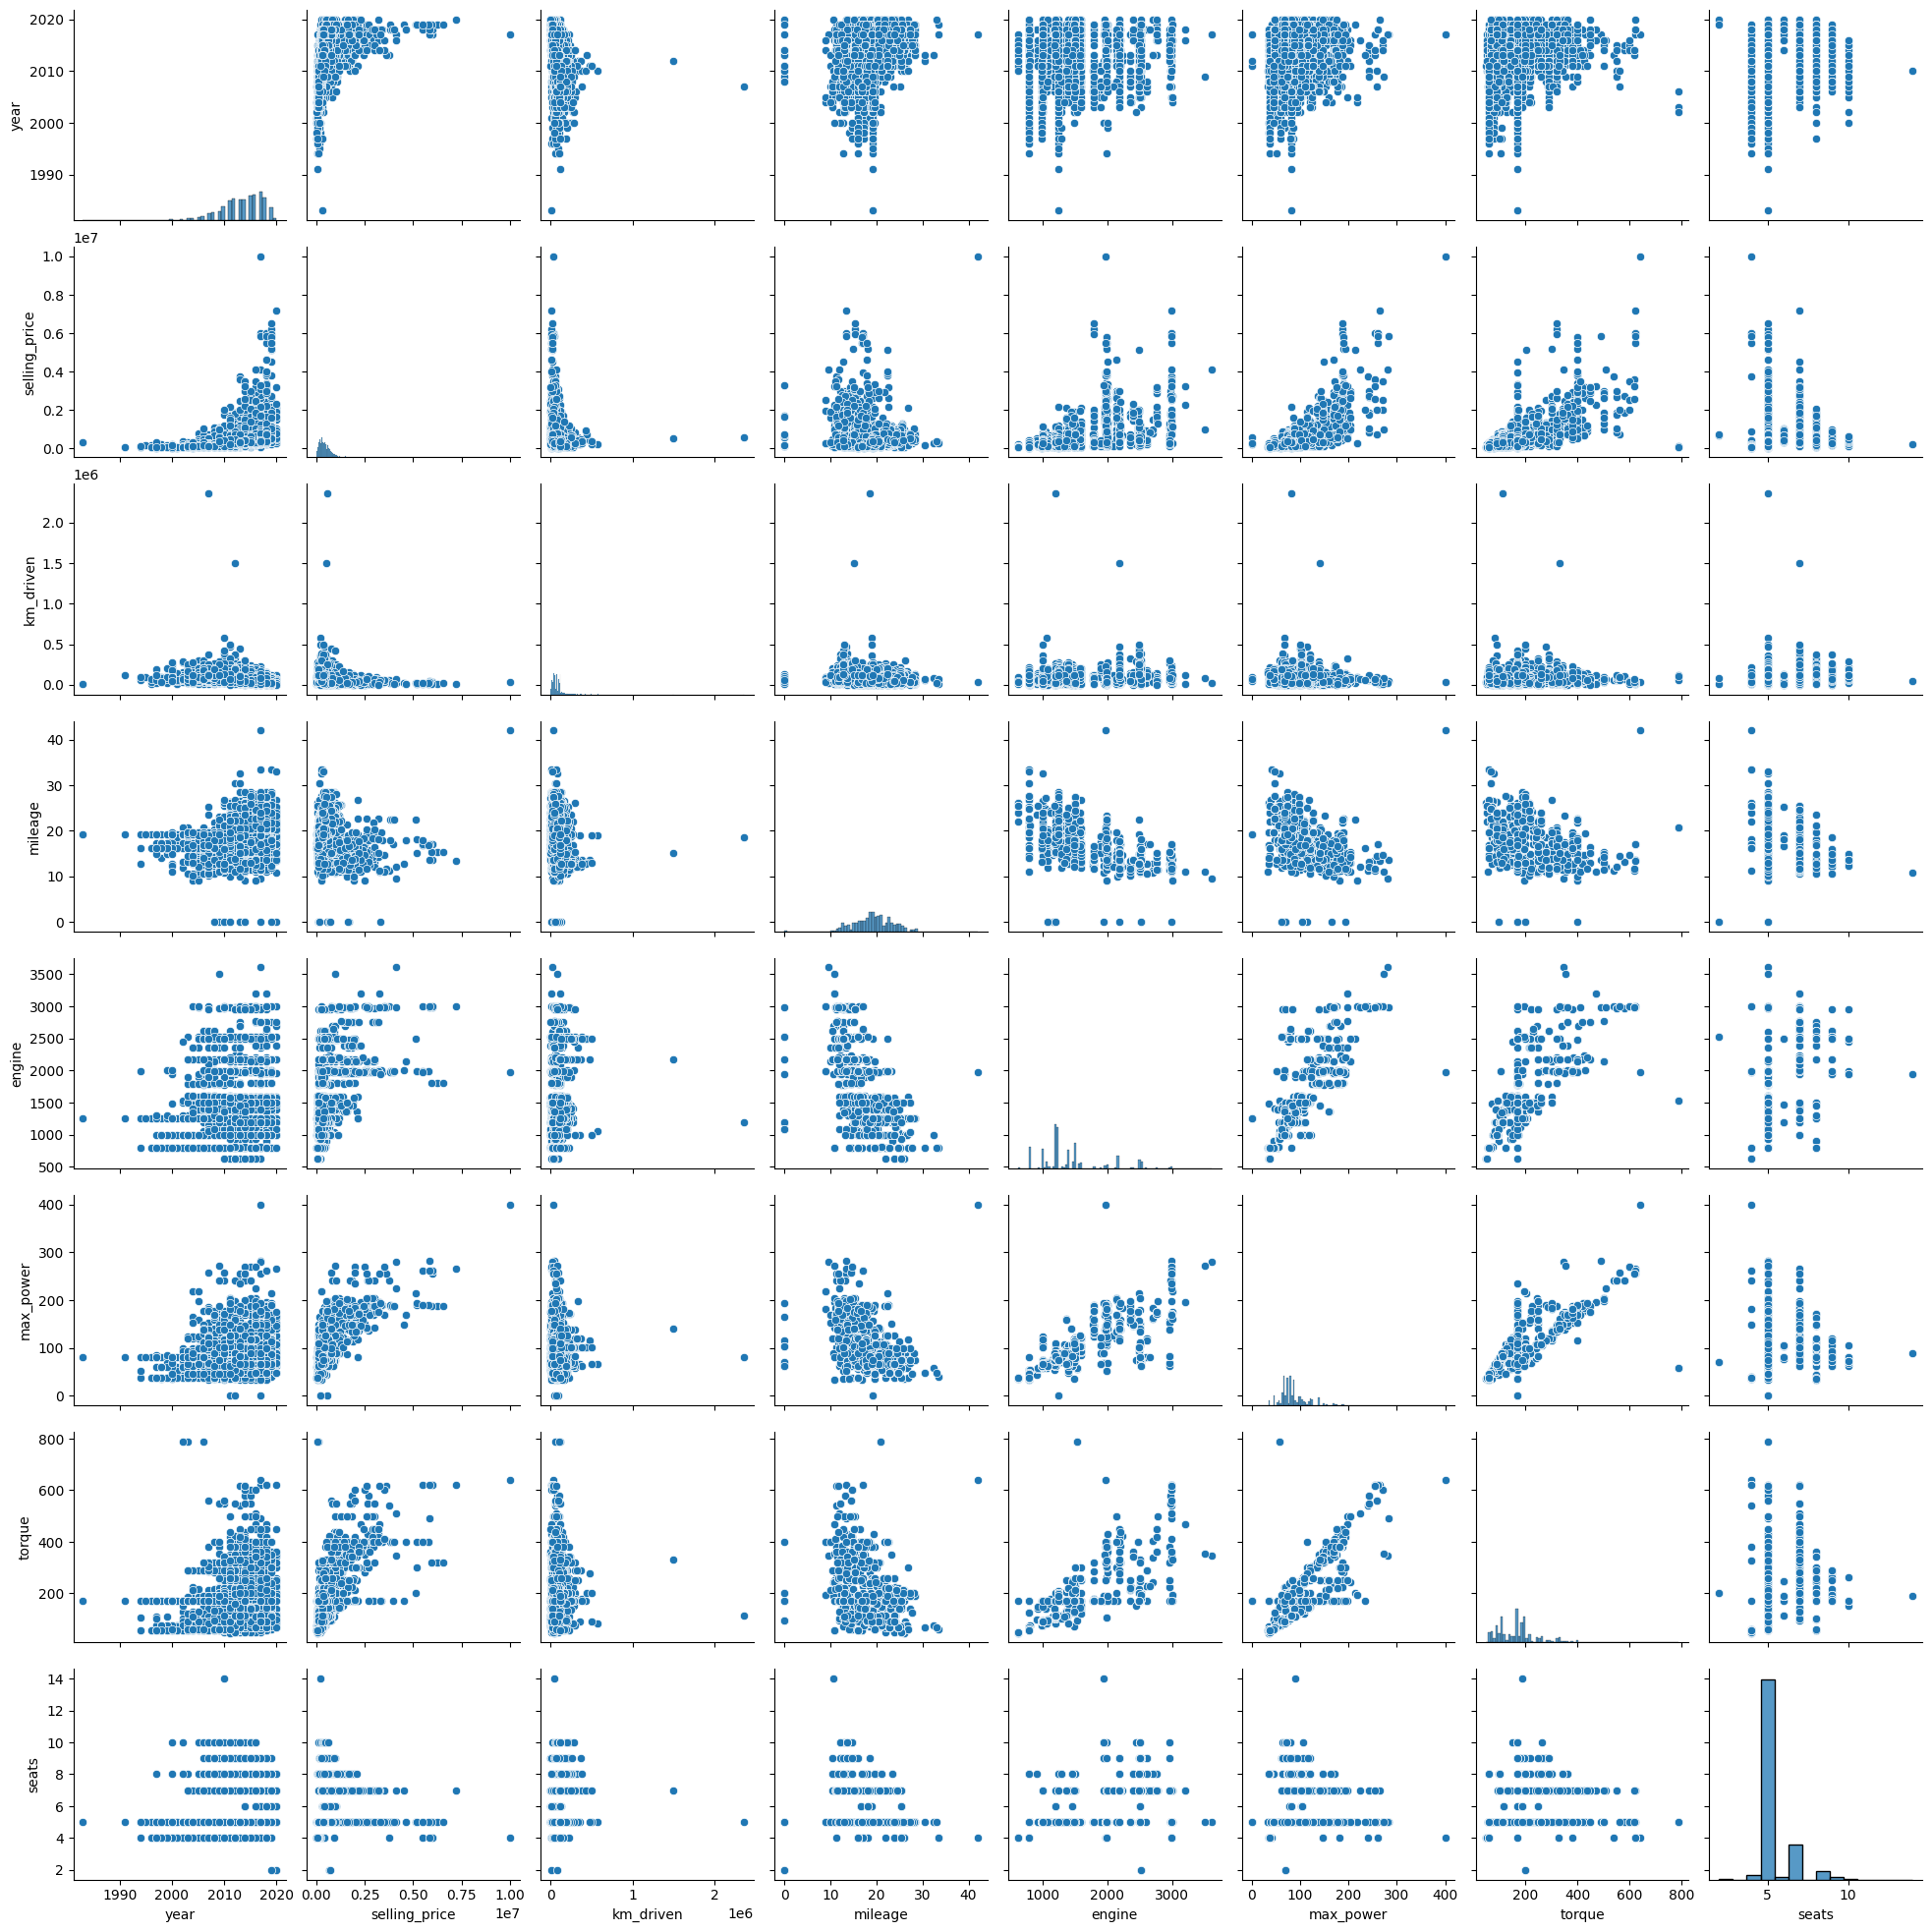

In [42]:
sns.pairplot(df_train)
plt.show()

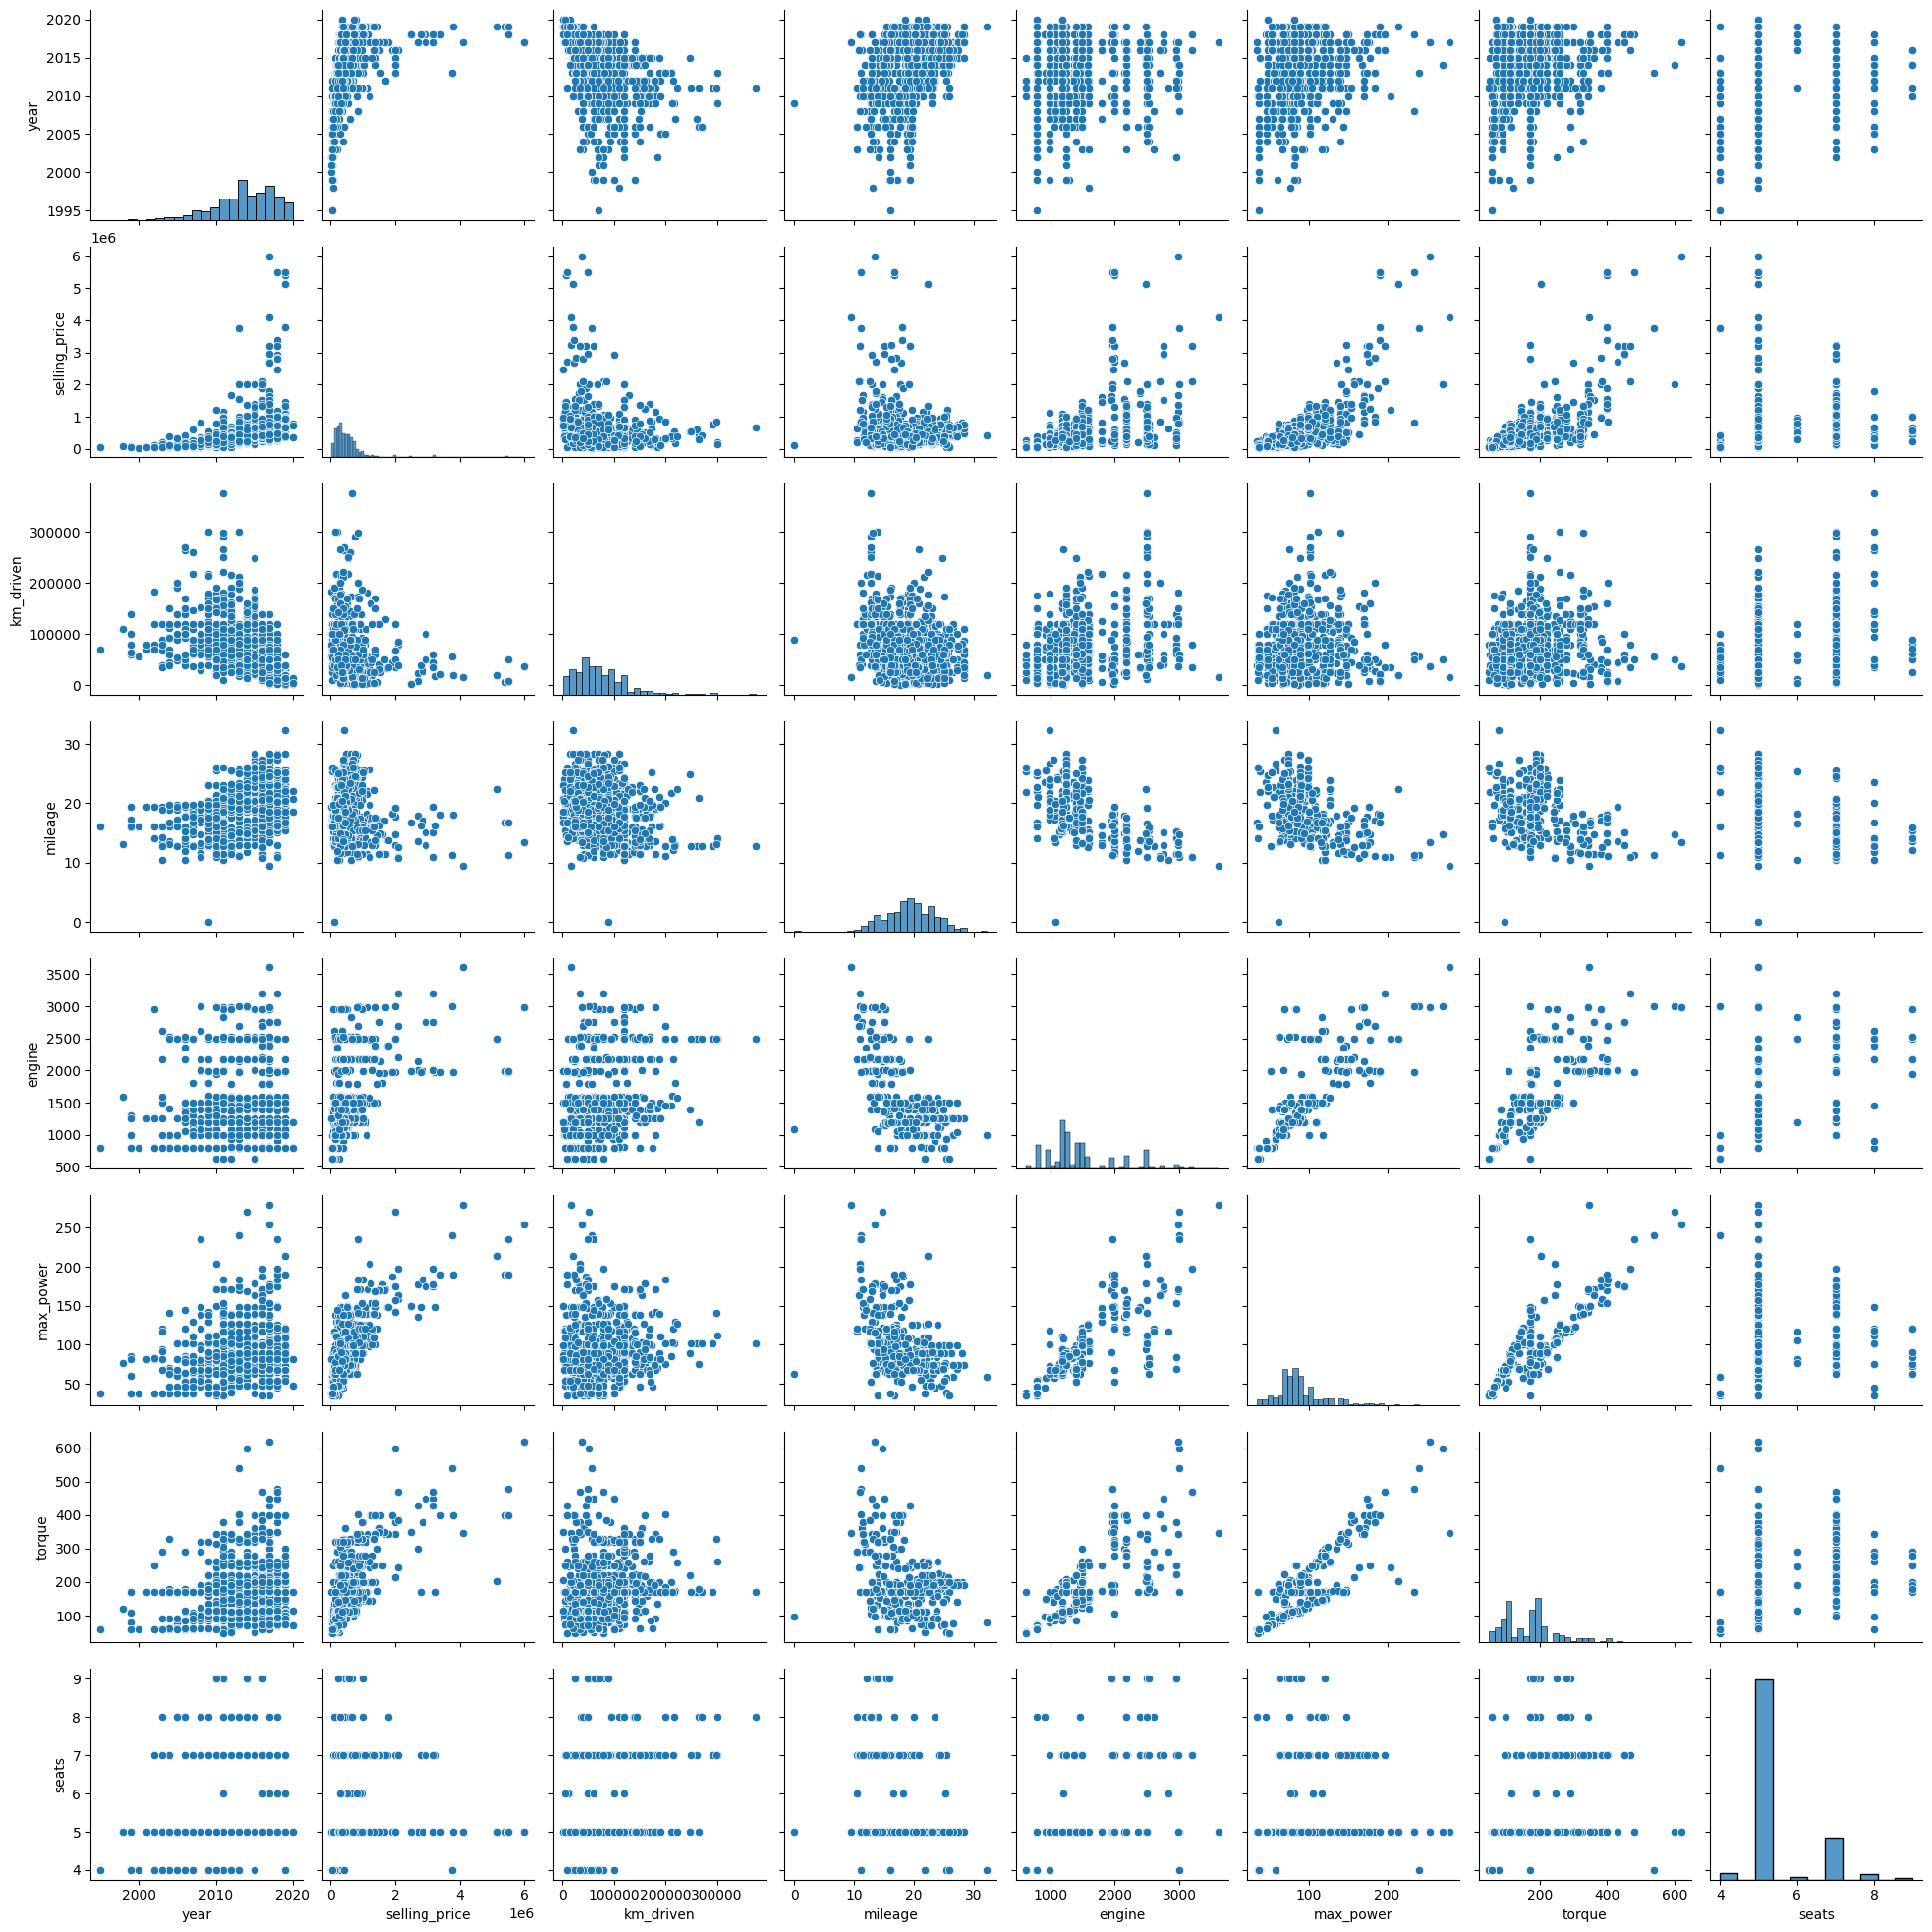

In [43]:
sns.pairplot(df_test)
plt.show()

Наблюдаем следующие связи целевой переменной (selling price) с факторными переменными:


1.   Прямая связь между ценой и годом выпуска автомобиля (новая машина стоит дороже)
2.   прямая связь цены с мощностью, объемом двигателя и крутящим моментом. Чем больше данные показатели, тем дороже автомобиль.
3. Обратная связь между ценой и количеством мест. На графике наблюдаем снижение цены при увеличении посадочных мест свыше 5. Возможно на это так же влияет низкая мощность и крутящий момент при объеме двигателя от 2000 до 3000куб.м.
Скорее всего автомобиль с большим количесвом посадочных мест относится к семейному классу так как наблюдается небольшой пробег. Если машина использоавлся в рабочих целях то пробег был бы сущесвтенно больше.
4. обратная связь между ценой и пробегом (чем выше пробег, тем дешевле машина).
5. Наблюда слабую кореляюцию между ценой и расходом топлива.


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


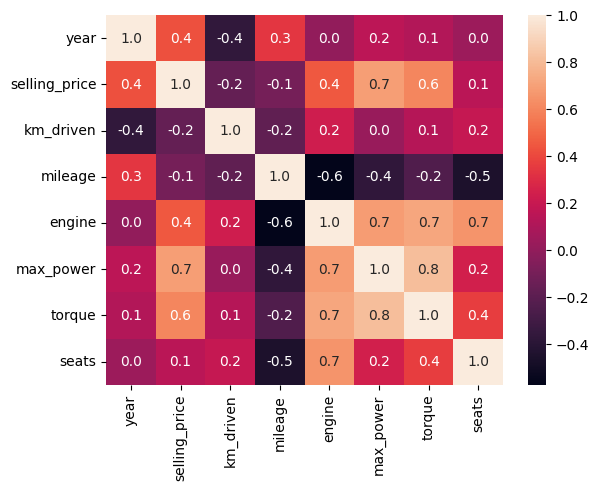

In [44]:
corr_map = df_train.select_dtypes(include='number').corr()
sns.heatmap(corr_map, annot=True, fmt='.1f')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1.Наименее скоррелированы между собой два показателя это год и объем двигателя (коэффициент корреляции = 0).
Это связано с тем, что каждый год выпускаются почти одинаковые наборы двигателей по объему для удволетворения всех классов потребителей (и соответсственно не наблюдается что в какой-то год стали пользоваться поплуярностью двигатели с определнным объемом).

2. Сильно скоррелированы мощность, крутящий момент,объем двигателя, а так же мощност и цена. Все факторы очевидно взаимосвязаны.
Для построения модели можно использовать фактор - мощность, так как наиболее скоррелирован с ценой.

3. Да, можно утверждать что чем старше автомобиль, тем выше пробег. Об обратной связи свидетельствует отрицательный коэффициент корреляции = -0.37.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

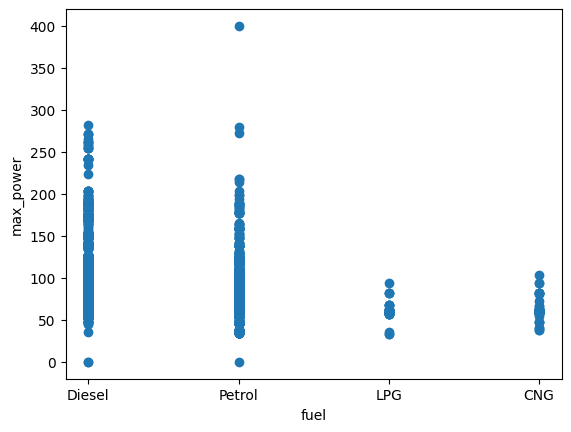

In [45]:
plt.scatter(x=df_train['fuel'], y=df_train['max_power'])
plt.xlabel('fuel')
plt.ylabel('max_power')
plt.show()

На графике видно, что мощные двигатели в основном используют Дизельное топливо и бензин. Двигатели на газе не дают высокую мощность. Это связано с тем что при сгорании газа выделяется меньше теплоты.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [46]:
y_train = df_train['selling_price']
X_train = df_train[['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]

In [47]:
assert X_train.shape == (5840, 6)

In [48]:
y_test = df_test['selling_price']
X_test = df_test[['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]

In [49]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from logging import LogRecord
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)
mse_train = MSE(y_train, y_train_lr)
rsq_train = r2_score(y_train, y_train_lr) * 100
mse_test = MSE(y_test, y_test_lr)
rsq_test = r2_score(y_test, y_test_lr) * 100
print(f'Result:')
print(f'Mean Squared Error (train): {mse_train:,.1f}')
print(f'Mean Squared Error (test):  {mse_test:,.1f}')
print(f'Rsquared (train):  {rsq_train:.1f}%')
print(f'Rsquared (test):   {rsq_test:.1f}%')

Result:
Mean Squared Error (train): 131,309,365,391.8
Mean Squared Error (test):  246,912,291,700.1
Rsquared (train):  54.2%
Rsquared (test):   57.0%


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [51]:
from sklearn.preprocessing import StandardScaler
# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)
lr.fit(X_train_trans, y_train)
y_train_trans = lr.predict(X_train_trans)
y_test_trans = lr.predict(X_test_trans)
mse_train_trans = MSE(y_train, y_train_trans)
rsq_train_trans = r2_score(y_train, y_train_trans) * 100
mse_test_trans = MSE(y_test, y_test_trans)
rsq_test_trans = r2_score(y_test, y_test_trans) * 100
print(f'Result:')
print(f'Mean Squared Error (train):   {mse_train_trans:,.1f}')
print(f'Mean Squared Error (test):    {mse_test_trans:,.1f}')
print(f'Rsquared (train):  {rsq_train_trans:.1f}%')
print(f'Rsquared (test):   {rsq_test_trans:.1f}%')

Result:
Mean Squared Error (train):   131,309,365,391.8
Mean Squared Error (test):    246,912,291,700.1
Rsquared (train):  54.2%
Rsquared (test):   57.0%


Изменение не наблюдается.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [52]:
# your code here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
lr.fit(X_train_trans, y_train)
y_train_trans = lr.predict(X_train_trans)

lr = LinearRegression()
lr.fit(X_train_trans, y_train_trans)

coefficients = lr.coef_
print("Коэффициенты:", coefficients)

feature_names = X_train.columns

# Нахождение индекса максимального коэффициента
max_index = np.argmax(coefficients)

# Вывод признака с наибольшим коэффициентом
print(f'Наиболее информативным признаком в предсказании цены с наибольшим коэффициентом является: {feature_names[max_index]} (коэффициент: {coefficients[max_index]})')

Коэффициенты: [-98324.84761158  93515.36925421  41698.52416989 333801.08960673
  52456.653374    13561.95450625]
Наиболее информативным признаком в предсказании цены с наибольшим коэффициентом является: max_power (коэффициент: 333801.0896067262)


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [53]:
from sklearn.linear_model import Lasso

# your code here
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=5)
lasso.fit(X_train_trans, y_train)
y_train_lasreg = lasso.predict(X_train_trans)
y_test_lasreg = lasso.predict(X_test_trans)
mse_train_lasreg = MSE(y_train, y_train_lasreg)
rsq_train_lasreg = r2_score(y_train, y_train_lasreg) * 100
mse_test_lasreg = MSE(y_test, y_test_lasreg)
rsq_test_lasreg = r2_score(y_test, y_test_lasreg) * 100
print(f'Lasso result:')
print(f'Mean Squared Error train: {mse_train_lasreg:,.1f}')
print(f'Mean Squared Error test:  {mse_test_lasreg:,.1f}')
print(f'Rsquared train:  {rsq_train_lasreg:.1f} %')
print(f'Rsquared test:   {rsq_test_lasreg:.1f} %')

Lasso result:
Mean Squared Error train: 131,309,365,571.5
Mean Squared Error test:  246,914,552,256.7
Rsquared train:  54.2 %
Rsquared test:   57.0 %


In [54]:
# your code here

print(lasso.coef_)

[-98319.58731315  93501.92614866  41689.86047996 333793.6371309
  52462.50143258  13555.21921025]


Модель не занулила веса.
 Оставшиеся признаки существены для прогноза.
 Увеличение Альфа до 5 не меняет ситуацию.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# your code here
lasso = Lasso()
pipeline = Pipeline([('scaler', scaler), ('lasso', lasso)])
param_grid = {
    'lasso__alpha': np.logspace(-2, 4, 400)
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Result:')
print(f"The best alpha: {grid_search.best_params_['lasso__alpha']:.1f}")
print(f"The best Mean Squared Error:   {-grid_search.best_score_:,.1f}")
print(f"Regression coefficients: {grid_search.best_estimator_.named_steps['lasso'].coef_}")

Result:
The best alpha: 2256.2
The best Mean Squared Error:   137,450,350,260.3
Regression coefficients: [-95910.50357361  87497.20005209  37667.11223693 330665.74977079
  54967.0075612   10607.36335536]


In [56]:
# your code here
l = grid_search.best_params_['lasso__alpha']
lasso = Lasso(alpha= l)
lasso.fit(X_train_trans, y_train)
y_train_lasreg = lasso.predict(X_train_trans)
y_test_lasreg = lasso.predict(X_test_trans)
mse_train_lasreg = MSE(y_train, y_train_lasreg)
rsq_train_lasreg = r2_score(y_train, y_train_lasreg) * 100
mse_test_lasreg = MSE(y_test, y_test_lasreg)
rsq_test_lasreg = r2_score(y_test, y_test_lasreg) * 100
print(f'Lasso')
print(f'Mean Squared Error  train: {mse_train_lasreg:,.1f}')
print(f'Mean Squared Error  test:  {mse_test_lasreg:,.1f}')
print(f'Rsquared train:  {rsq_train_lasreg:.1f}%')
print(f'Rsquared test:   {rsq_test_lasreg:.1f}%')

Lasso
Mean Squared Error  train: 131,345,645,246.6
Mean Squared Error  test:  247,953,547,763.4
Rsquared train:  54.2%
Rsquared test:   56.9%


При значении 400 параметра alpha и cv=10 в диапазонее 10^-2 и 10^4 = 4 000 моделей.
Лучший коэфициент регуляризации = 2256
Значение MSE получилось хуже, чем при alpha = 5. КОэфициенты не занулились.






In [57]:
import numpy as np
n_alpha_values = 400  # np.logspace(-2, 4, 400)
n_folds = 10  #  cv=10
total_models = n_alpha_values * n_folds
print(f"Общее количество моделей, которые будут обучены: {total_models}")

Общее количество моделей, которые будут обучены: 4000


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [58]:
from sklearn.linear_model import ElasticNet
# your code here
elc = ElasticNet()
pipeline = Pipeline([
    ('scaler', scaler),
    ('elc', elc)
])
param_grid = {
    'elc__alpha': np.logspace(-2, 4, 300),
    'elc__l1_ratio': np.linspace(0, 1, 10)
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10,
                           scoring='neg_mean_squared_error', n_jobs=-1,
                           verbose=0)
grid_search.fit(X_train, y_train)
print(f"The best parameter")
print(f"The best alpha:    {grid_search.best_params_['elc__alpha']:.1f}")
print(f"The best l1_ratio: {grid_search.best_params_['elc__l1_ratio']:.1f}")
print(f"The best Mean Squared Error:      {-grid_search.best_score_:,.1f}")
print(f"Regression coefficients: {grid_search.best_estimator_.named_steps['elc'].coef_}")

The best parameter
The best alpha:    2279.6
The best l1_ratio: 1.0
The best Mean Squared Error:      137,450,358,475.7
Regression coefficients: [-95885.65397031  87434.98678563  37626.34996932 330632.63155439
  54993.07058549  10576.32704057]


In [59]:
import numpy as np
n_alpha_values = 300  # np.logspace(-2, 4, 300)
n_folds = 10  #  cv=10
total_models = n_alpha_values * n_folds
print(f"Общее количество моделей, которые будут обучены: {total_models}")

Общее количество моделей, которые будут обучены: 3000




1.   Пришлось обучать 3000 моделей np.logspace(-2, 4,300), сv=10.
2.   Лучший параметр l1_ratio: 1.00 - => значение совпадает с лассо-регуляризацией расчитанным ранее с параметром np.logspace(-2, 4, 300).




# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [60]:
# your code here
X_train_categor = df_train.drop(['name', 'selling_price'], axis=1)
X_test_categor = df_test.drop(['name', 'selling_price'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [61]:
X_train_categor_name = df_train.drop('selling_price', axis=1).copy()

In [62]:
X_train_categor_name.name.value_counts()

,count
name,
Maruti Swift Dzire VDI,91
Maruti Alto 800 LXI,58
Maruti Alto LXi,56
Maruti Swift VDI,48
Maruti Swift VDI BSIV,47
...,...
Honda Amaze S AT i-Vtech,1
Honda Jazz 1.2 SV i VTEC,1
Maruti Baleno Zeta,1


можно раздеить на бренд автомобиля и модель бренда.

In [63]:
X_train_categor_name[['car_brand', 'model']] = X_train_categor_name['name'].str.split(n=2, expand=True)[[0, 1]]
X_train_categor_name.drop(columns=['name'], inplace=True)

In [64]:
X_train_categor_name.car_brand.value_counts()[:10]

,count
car_brand,
Maruti,1804
Hyundai,1058
Mahindra,611
Tata,534
Toyota,309
Ford,308
Honda,308
Chevrolet,188
Renault,171


In [65]:
X_train_categor_name.model.value_counts()[:10]

,count
model,
Swift,558
Alto,316
i20,247
Wagon,205
Innova,160
Bolero,156
Verna,149
City,141
Figo,135


In [66]:
columns_with_na = df_train.isna().sum()[df_train.isna().sum() > 0].index.to_list()
df_train[columns_with_na].dtypes

,0


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [67]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
columns_scaling = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']
cat_t = OneHotEncoder(drop='first')
num_t = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_t, features),
        ('num', num_t, columns_scaling)
    ])
X_train_t = preprocessor.fit_transform(X_train_categor)
X_test_t = preprocessor.transform(X_test_categor)
X_train_t_data = pd.DataFrame(X_train_t)
X_test_t_data = pd.DataFrame(X_test_t)

In [87]:
import pickle

In [90]:
with open('ColumnTransformer.pkl', 'wb') as file:
    pickle.dump(ColumnTransformer, file)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
ridgereg = Ridge()
param_grid = {
    'alpha': np.logspace(-3, 3, 100)
}
gs = GridSearchCV(estimator=ridgereg, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1)
gs.fit(X_train_t_data, y_train)
rsquared = gs.best_score_
ridge_alpha = gs.best_params_['alpha']
print(f"Показатели:")
print(f"The best alpha: {ridge_alpha:.5f}")
print(f"The best Rsquared: {rsquared:.2f}")

Показатели:
The best alpha: 6.57933
The best Rsquared: 0.63


In [69]:
ridgereg = Ridge(alpha=gs.best_params_['alpha'])
ridgereg.fit(X_train_t_data, y_train)
y_train_ridgereg = ridgereg.predict(X_train_t_data)
y_test_ridgereg = ridgereg.predict(X_test_t_data)

mse_train_ridgereg = MSE(y_train, y_train_ridgereg)
rsq_train_ridgereg = r2_score(y_train, y_train_ridgereg) * 100
mse_test_ridgereg = MSE(y_test, y_test_ridgereg)
rsq_test_ridgereg = r2_score(y_test, y_test_ridgereg) * 100
print(f'Показатели')
print(f'Mean Squared Error  train: {mse_train_ridgereg:,.1f}')
print(f'Mean Squared Error  test:  {mse_test_ridgereg:,.1f}')
print(f'Rsquared train:  {rsq_train_ridgereg:.1f}%')
print(f'Rsquared test:   {rsq_test_ridgereg:.1f}%')

Показатели
Mean Squared Error  train: 97,095,205,325.2
Mean Squared Error  test:  201,661,972,550.5
Rsquared train:  66.1%
Rsquared test:   64.9%


Качество модели лучше:
Rsquared test увеличился с 57% до 65%, ean Squared Error  test: снизился до 201 с 247 млн.

In [82]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,260.0,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260.0,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,172.0,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,200.0,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,96.0,5


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [70]:

    # your code here
import numpy as np
def business_metric(y_true, y_pred):
  assert y_true.shape[0] == y_pred.shape[0], "Длины y_true и y_pred должны совпадать"
  percentage_diff = np.abs((y_pred / y_true - 1) * 100)
  pred_diff = (percentage_diff >= 10).astype(int)

  share_10 = (np.sum(pred_diff) / len(pred_diff)) * 100
  return share_10

print('Доля прогнозов, отличающихся от реальных цен на авто более чем на 10% (в одну или другую сторону):')
print(f'linear regression (без стандартизации): {business_metric(y_test, y_test_lr):.1f}')
print(f'linear regression (со стандартизацией): {business_metric(y_test, y_test_trans):.1f}')
print(f'Lasso: {business_metric(y_test, y_test_lasreg):.1f}')
print(f'Ridge регрессия: {business_metric(y_test, y_test_ridgereg):.1f}')

Доля прогнозов, отличающихся от реальных цен на авто более чем на 10% (в одну или другую сторону):
linear regression (без стандартизации): 82.0
linear regression (со стандартизацией): 82.0
Lasso: 81.9
Ridge регрессия: 75.3


1.   Стандартизация данных не повлияла на результат линейной регрессии
2.   Lasso и Ridge регрессия показали некоторое улучшение. Lasso и Ridge, будучи методами регуляризации, способны лучше справляться с переобучением и шумом в данных по сравнению с обычной линейной регрессией. Ridge дает наиболее заметное улучшение.





# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [72]:
!pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.1 MB/s eta 0:00:00


In [73]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [92]:
pip install python-multipart

In [93]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from sklearn.linear_model import Ridge
import pickle, logging, io
from contextlib import asynccontextmanager
import numpy as np
from sklearn.compose import ColumnTransformer
import pandas as pd
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import StreamingResponse
from io import StringIO

logging.basicConfig(level=logging.INFO)

model: Ridge = None
preprocessor: ColumnTransformer = None

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

@asynccontextmanager
async def lifespan(app: FastAPI):
    logging.info("Start context loading")
    global model, preprocessor
    try:
        with open('ridge.pkl', 'rb') as file:
            model = pickle.load(file)
        logging.info(f"Модель загружена из ridge.pkl.")

        with open('column_transformer.pkl', 'rb') as file:
            preprocessor = pickle.load(file)
        logging.info(f"ColumnTransformer загружен из column_transformer.pkl.")

        yield
    except Exception as e:
        logging.error(f"Ошибка при загрузке: {e}")
    finally:
        model = None
        preprocessor = None

app = FastAPI(lifespan=lifespan)

@app.post("/predict_item")
async def predict_item(item: Item) -> float:
    return get_predict_item(item)


@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)) -> StreamingResponse:
    contents = file.file.read()
    s = str(contents,'utf-8')
    data = StringIO(s)
    df = pd.read_csv(data)
    data.close()
    file.file.close()
    predictions = get_predict_items(df)
    df['predictions'] = predictions
    csv_buffer = io.StringIO()
    df.to_csv(csv_buffer, index=False)
    csv_buffer.seek(0)
    return StreamingResponse(io.StringIO(csv_buffer.getvalue()),
                             media_type="text/csv",
                             headers={"Content-Disposition": "attachment; filename=predictions.csv"})

def get_predict_item(item) -> float:
    features = create_df_from_item(item)
    prediction = model.predict(features)
    return float(prediction[0])

def get_predict_items(items) -> List[float]:
    features = create_df_from_items(items)
    predictions = model.predict(features)
    return predictions.tolist()

def create_df_from_items(items) -> pd.DataFrame:
    items.drop("selling_price", axis=1, inplace=True)
    df = preprocess_items(items)
    df = transform_item(df)
    return df

def create_df_from_item(item: Item) -> pd.DataFrame:
    item_dict = item.model_dump()
    df = pd.DataFrame([item_dict])
    df = preprocess_items(df)
    df = transform_item(df)
    return df

def transform_item(features: pd.DataFrame) -> pd.DataFrame:
    return preprocessor.transform(features)

def parse_torque(value):
    if pd.notna(value):
        kgm_w = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*kgm')
        nm_w = pd.Series(value).str.extract(r'(\d+(\.\d+)?)\s*Nm')
        if not kgm_w.empty and kgm_w[0].notna().any():
            kgm_value = float(kgm_w[0].iloc[0])
            return kgm_value * 9.81
        elif not nm_w.empty and nm_w[0].notna().any():
            return float(nm_w[0].iloc[0])
    return None

def preprocess_items(items: pd.DataFrame) -> pd.DataFrame:
    items['mileage'] = items['mileage'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
    items['engine'] = items['engine'].str.replace(' CC', '', regex=False).astype(float)
    items['max_power'] = pd.to_numeric(items['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')
    items['torque'] = items['torque'].apply(parse_torque).astype(float)

    items['seats'] = items['seats'].astype(int)
    return items

In [80]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/data'
/content


In [85]:
import pickle

In [86]:
with open('ridge.pkl', 'wb') as file:
    pickle.dump(ridge, file)

NameError: name 'ridge' is not defined

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

